# Spicy plots with matplotlib

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib.font_manager
from IPython.core.display import HTML
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

import pandas as pd
import numpy as np

from PIL import Image, ImageSequence


## Check installed fonts

In [2]:
#clear the matplotlib font cache (this is important!!!)
!rm -fr ~/.cache/matplotlib

#originally from: http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])
HTML("<div style='column-count: 2;'>{}</div>".format(code))



## Do a test plot for the newly installed fonts

([], <a list of 0 Text major ticklabel objects>)

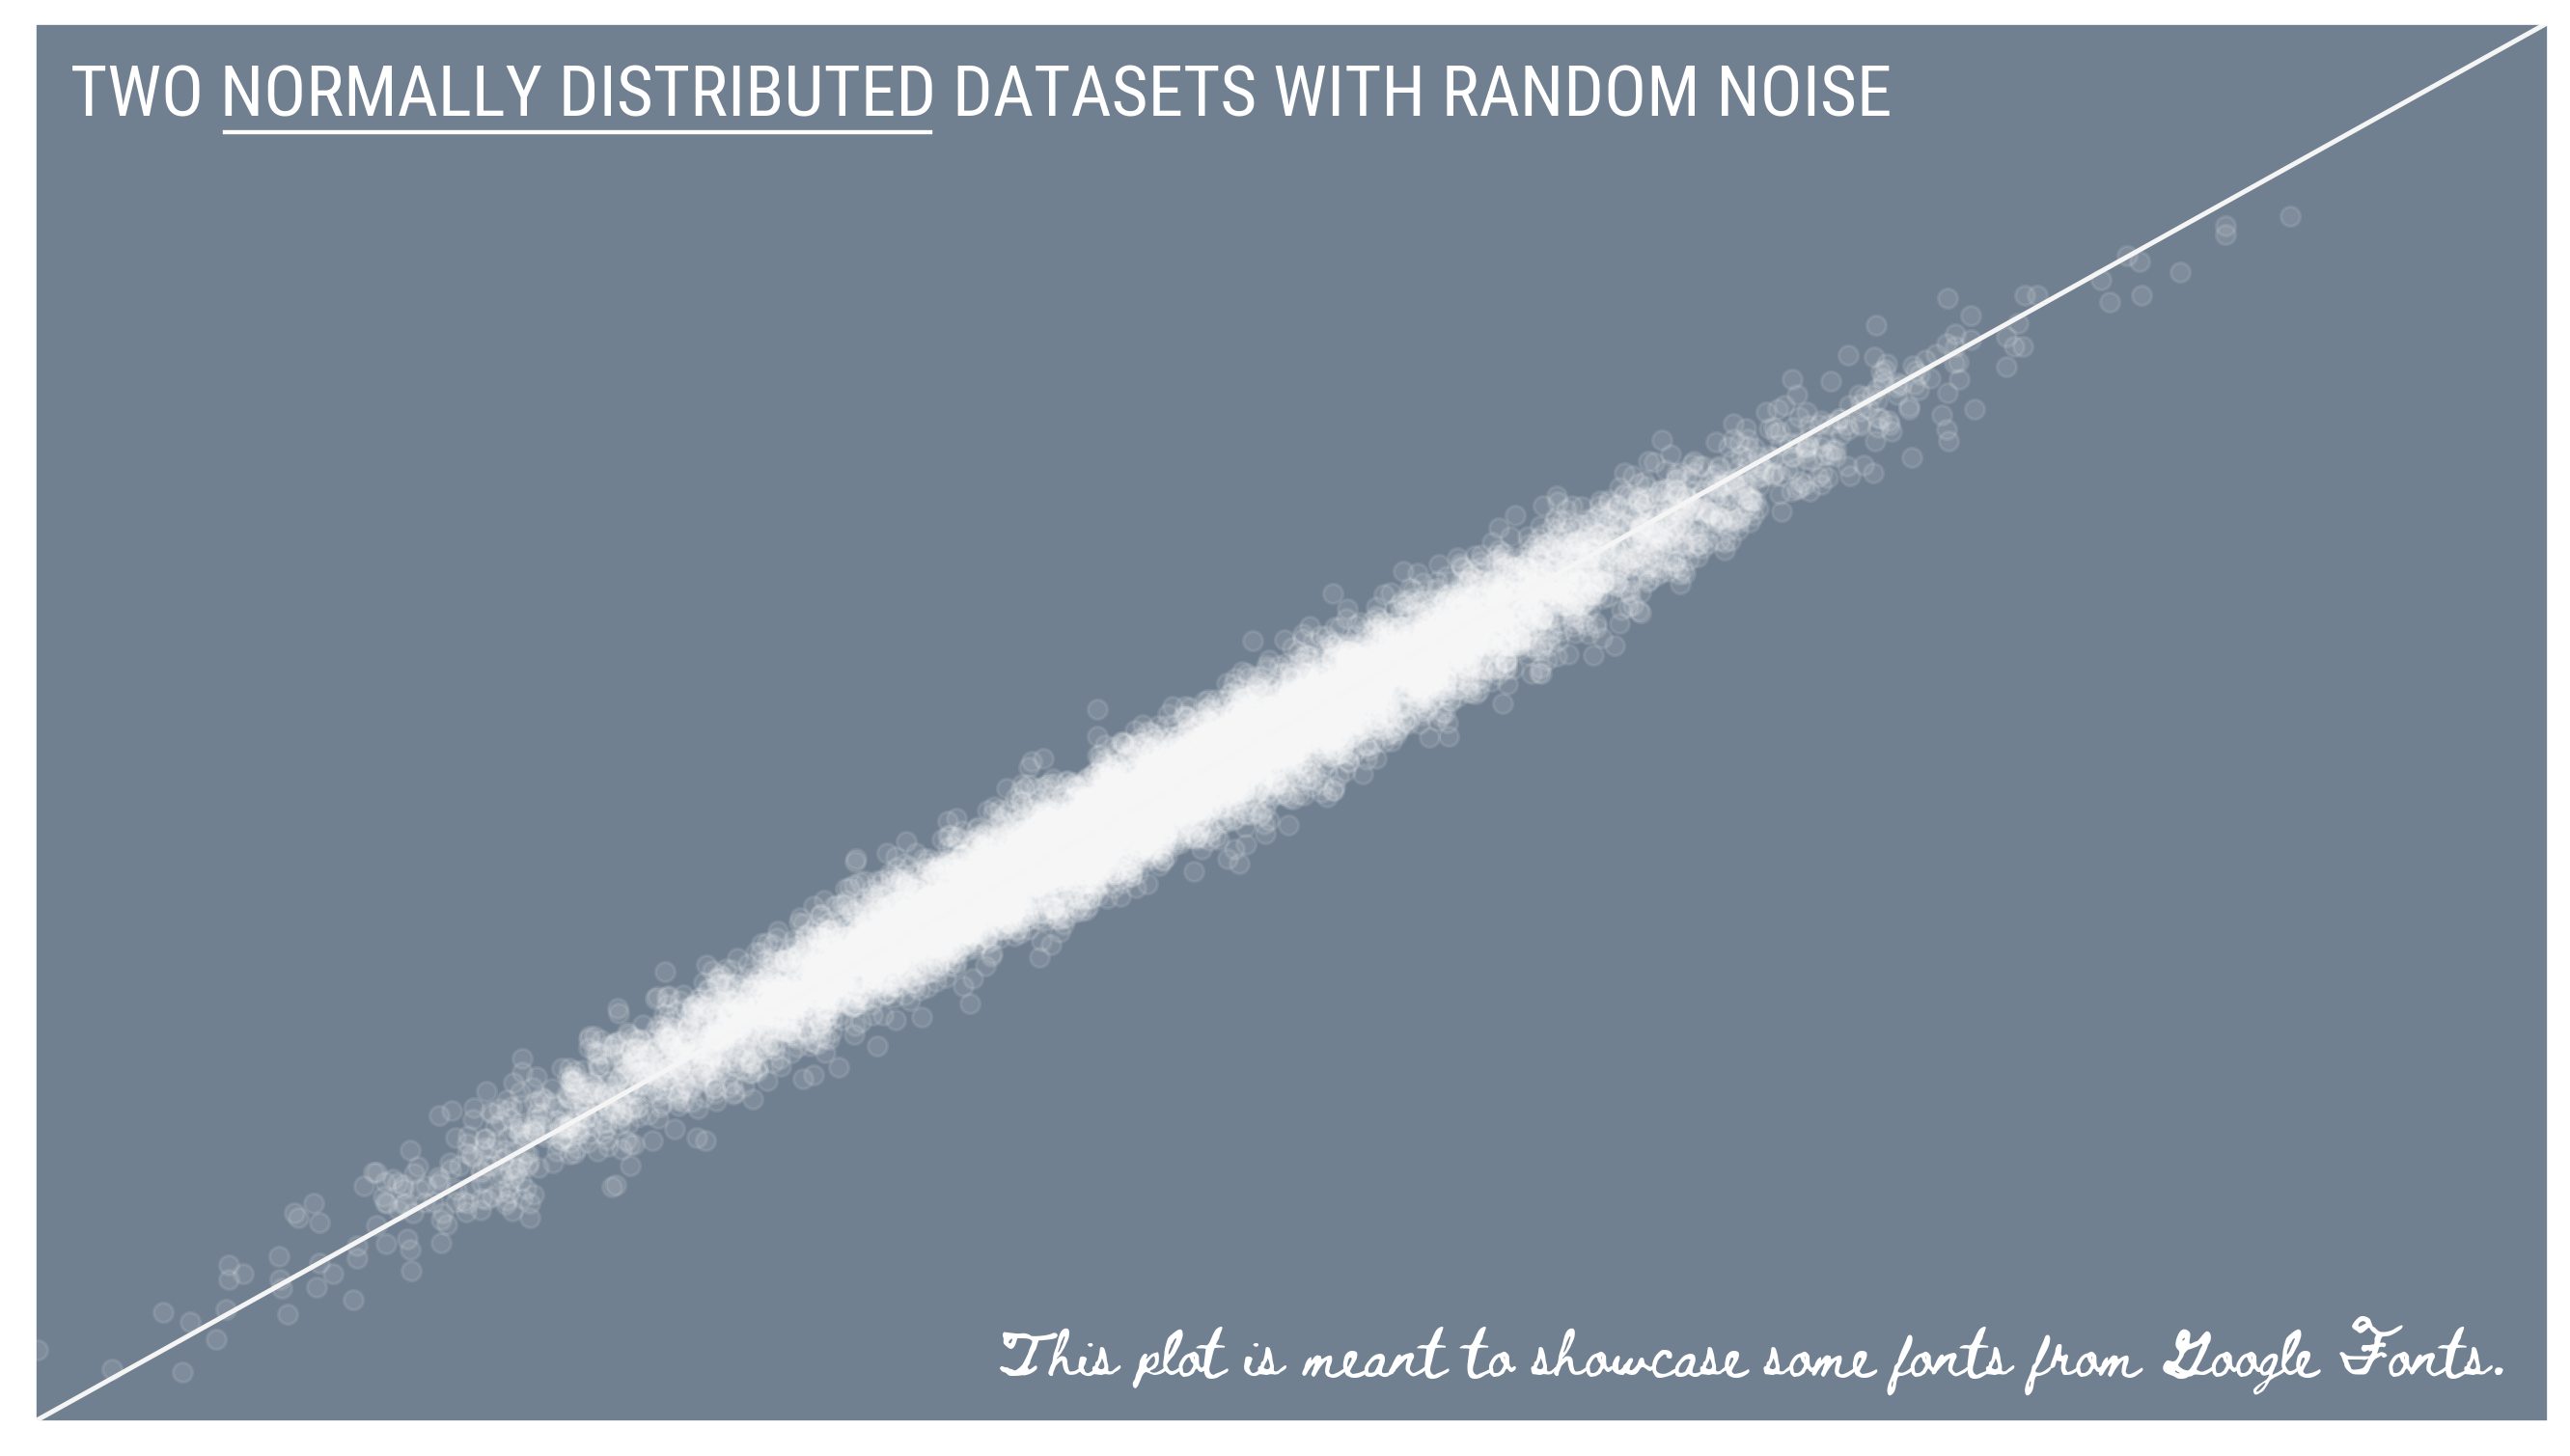

In [3]:
#the new fonts to be used
axis_font = "Roboto Condensed"
testtext_font = "Beth Ellen"

#set plot background
plt.rcParams['axes.facecolor'] = 'slategray'

#generate some data
random_array1 = np.random.normal(4, size=(1,10000))
generic_noise = np.random.normal(size=(1,10000))/5 #noise applied to x axis to make data look more realistic

#plot it
fig = figure(num=None, figsize=(14, 8), dpi=240, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.scatter(random_array1 + generic_noise , random_array1, color='white', alpha=0.1)
plt.plot([-1,9],[-1,9], color='whitesmoke' )
plt.xlim(0, 9)
plt.ylim(0, 9)

#add title
plt.text(0.13,8.4,"TWO NORMALLY DISTRIBUTED DATASETS WITH RANDOM NOISE",fontname=axis_font, fontsize=22,color="white")#,bbox=dict(facecolor='slategray',alpha=1))
plt.arrow(0.68, 8.3, 2.53, 0, head_width=0, head_length=0, color="white")

#hide axes
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

#show test text
plt.text(3.45,0.3,"This plot is meant to showcase some fonts from Google Fonts.",fontname=testtext_font, fontsize=14,color="white")#,bbox=dict(facecolor='gainsboro',alpha=1))

#disable ticks
plt.xticks([])
plt.yticks([])


## Use images as points on your scatter plots

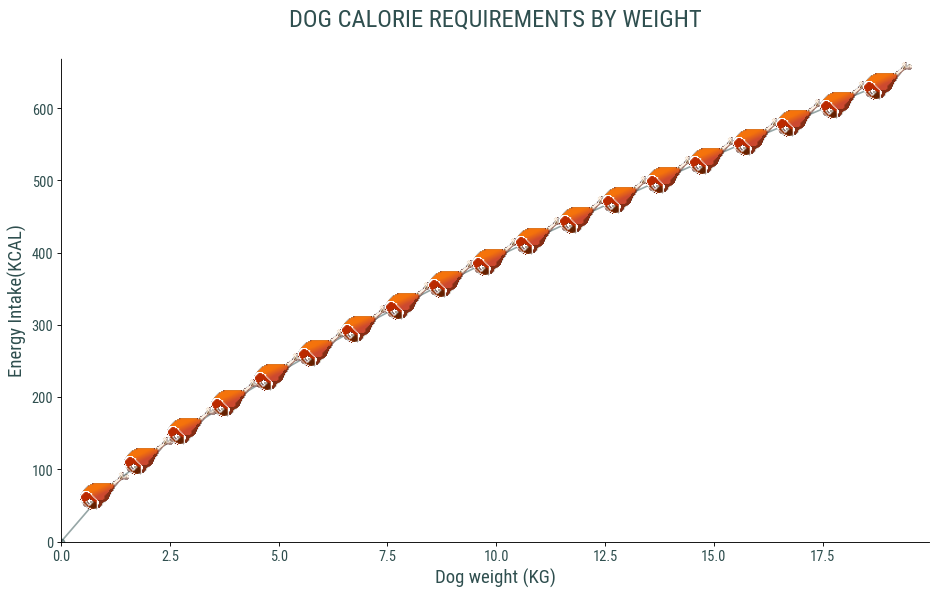

In [4]:
def getImage(path):
    
    img = Image.open(path)
    rsize = img.resize((np.array(img.size)/20).astype(int)) # Use PIL to resize
    #print(a)
    return OffsetImage(rsize)

#the new fonts to be used
axis_font = "Roboto Condensed"
plt.rcParams['axes.facecolor'] = 'white'

dog_weights = list(range(20))
kcal_requirements = [70 * (x)**(3/4) for x in dog_weights]

#plot it
fig,ax = plt.subplots(figsize=(14, 8), dpi=80)
plt.plot(dog_weights , kcal_requirements, color='darkslategray', alpha=0.5)
plt.scatter(dog_weights , kcal_requirements, color='darkslategray', alpha=0.5)

#set axis limits
plt.xlim(0)
plt.ylim(0)

plt.title("DOG CALORIE REQUIREMENTS BY WEIGHT\n",fontname=axis_font, fontsize=22, color="darkslategray")

ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

#Change the tick font and size
for tick in ax.get_xticklabels():
    tick.set_fontname(axis_font)
    tick.set_size(13)
    tick.set_color("darkslategray")

for tick in ax.get_yticklabels():
    tick.set_fontname(axis_font)
    tick.set_color("darkslategray")
    tick.set_size(13)

plt.xlabel("Dog weight (KG)", fontname=axis_font, fontsize=17, color="darkslategray")
plt.ylabel("Energy Intake(KCAL)", fontname=axis_font, fontsize=17, color="darkslategray")

#for each point in the scatter plot, put an image there

for x0, y0 in zip(dog_weights, kcal_requirements):
    if x0 == 0:
        continue
    ab = AnnotationBbox(getImage("images/nuggies.png"), (x0, y0), frameon=False)
    ax.add_artist(ab)


fig.savefig("dogrer.png", bbox_inches='tight')


## Add gifs or static images to annotate your plots

In [5]:

def add_overlay(base_im, overlay_im, newsize, pos, outname='output.gif'):
    '''Adds a png or gif to your plot'''
    
    original_image = Image.open(base_im)
    animated_gif = Image.open(overlay_im)

    frames = []
    for frame in ImageSequence.Iterator(animated_gif):

        #resize each frame
        frame = frame.resize(newsize) 
        original_image = original_image.copy()
        original_image.paste(frame, pos)
        frames.append(original_image)
    frames[0].save(outname, save_all=True, append_images=frames[1:], duration=70,loop=0)
    

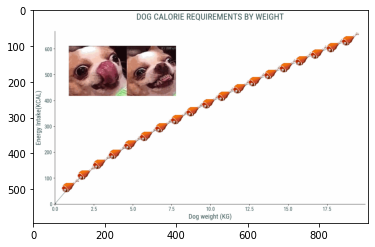

In [6]:
add_overlay("dogrer.png", "images/doggo.jpg", newsize=(300,140), pos=(100,100), outname="hungrydog.gif")

#lets add our logo as an overlay to our previous plot
plt.imshow(plt.imread("hungrydog.gif"))

## Make your plots expressive with gifs

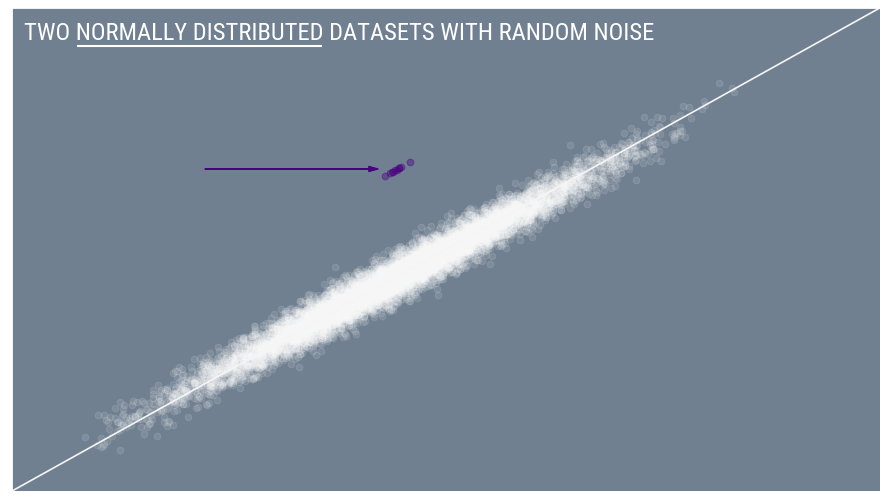

In [7]:
#the new fonts to be used
axis_font = "Roboto Condensed"
plt.rcParams['axes.facecolor'] = 'slategray'

#generate some data
random_array1 = np.random.normal(4, size=(1,10000))
outlier_noise = np.random.normal(4,0.06,size=(1,10)) #some noise to cause outliers at a specific point
generic_noise = np.random.normal(size=(1,10000))/5 #noise applied to x axis to make data look more realistic

#plot it
fig = figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.scatter(random_array1 + generic_noise , random_array1, color='white', alpha=0.1)
plt.scatter(outlier_noise ,outlier_noise + 2, color='indigo', alpha=0.4)
plt.plot([-1,9],[-1,9], color='whitesmoke' )

plt.xlim(0, 9)
plt.ylim(0, 9)

#title text
plt.text(0.13,8.4,"TWO NORMALLY DISTRIBUTED DATASETS WITH RANDOM NOISE",fontname=axis_font, fontsize=22,color="white")#,bbox=dict(facecolor='slategray',alpha=1))
plt.arrow(0.68, 8.3, 2.53, 0, head_width=0, head_length=0, color="white")

#arrow for gif annotation
plt.arrow(2, 6, 1.7, 0, head_width=0.1, head_length=0.1, color="indigo")

#hide axes
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

#disable ticks
plt.xticks([])
plt.yticks([])

#now save the plot on disk for later use
fig.savefig("giftest.png", bbox_inches='tight')


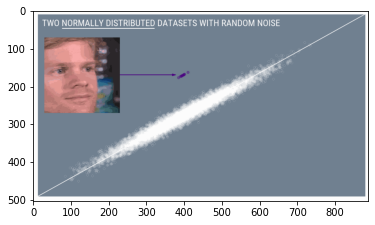

In [8]:
add_overlay("giftest.png", "images/meme.gif", newsize=(200,200), pos=(30,70), outname="gif_meme1.gif")

#lets take a peek at the result
plt.imshow(plt.imread("gif_meme1.gif"))

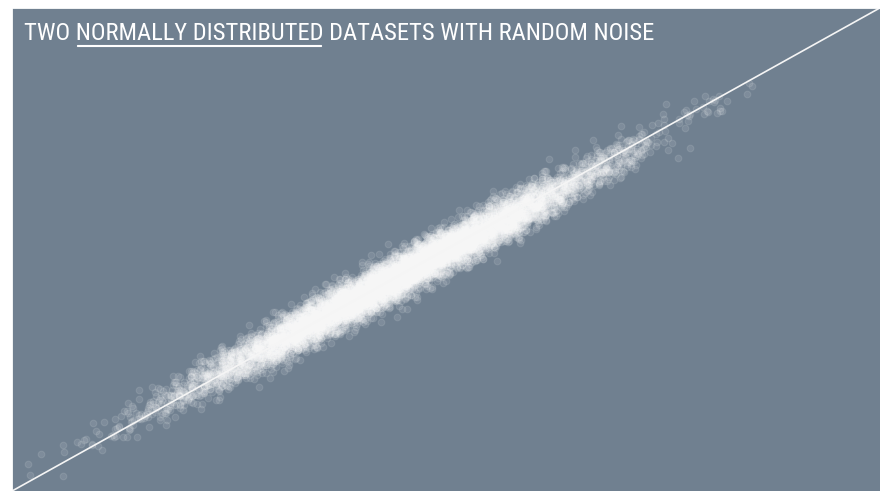

In [9]:
#the new fonts to be used
axis_font = "Roboto Condensed"
plt.rcParams['axes.facecolor'] = 'slategray'

#generate some data
random_array1 = np.random.normal(4, size=(1,10000))
outlier_noise = np.random.normal(4,0.06,size=(1,10)) #some noise to cause outliers at a specific point
generic_noise = np.random.normal(size=(1,10000))/5 #noise applied to x axis to make data look more realistic

#plot it
fig = figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

plt.scatter(random_array1 + generic_noise , random_array1, color='white', alpha=0.1)
plt.plot([-1,9],[-1,9], color='whitesmoke' )

plt.xlim(0, 9)
plt.ylim(0, 9)

#title text
plt.text(0.13,8.4,"TWO NORMALLY DISTRIBUTED DATASETS WITH RANDOM NOISE",fontname=axis_font, fontsize=22,color="white")#,bbox=dict(facecolor='slategray',alpha=1))
plt.arrow(0.68, 8.3, 2.53, 0, head_width=0, head_length=0, color="white")

#hide axes
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

#disable ticks
plt.xticks([])
plt.yticks([])

#now save the plot on disk for later use
fig.savefig("giftest2.png", bbox_inches='tight')

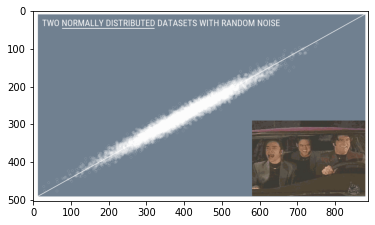

In [10]:
add_overlay("giftest2.png", "images/meme2.gif", newsize=(300,200), pos=(580,290), outname="gif_meme2.gif")

#lets take a peek at the result
plt.imshow(plt.imread("gif_meme2.gif"))